In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA

In [2]:
dados = datasets.load_iris()

#### Análise dos dados

In [3]:
X = dados.data
y = dados.target

df = pd.DataFrame(X)
df.columns = dados.feature_names
df['target'] = y
df.head(n=10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [4]:
print(' O conjunto tem', df.shape[0], 'amostras')

 O conjunto tem 150 amostras


In [5]:
df['target'].value_counts()

0    50
1    50
2    50
Name: target, dtype: int64

Conjunto bem balanceado.

Tipos das variaveis: 



In [6]:
df.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
target                 int64
dtype: object

In [7]:
df.median()

sepal length (cm)    5.80
sepal width (cm)     3.00
petal length (cm)    4.35
petal width (cm)     1.30
target               1.00
dtype: float64

In [8]:
df.std()

sepal length (cm)    0.828066
sepal width (cm)     0.435866
petal length (cm)    1.765298
petal width (cm)     0.762238
target               0.819232
dtype: float64

In [9]:
tabela = df.groupby('target').agg(
    {
     x: ['median', 'mean', 'std'] for x in df.columns if x != 'target'
     }
    )

tabela

sepal length (cm)                   ... petal width (cm)                 
                  median   mean       std  ...           median   mean       std
target                                     ...                                  
0                    5.0  5.006  0.352490  ...              0.2  0.246  0.105386
1                    5.9  5.936  0.516171  ...              1.3  1.326  0.197753
2                    6.5  6.588  0.635880  ...              2.0  2.026  0.274650

[3 rows x 12 columns]

In [10]:
# Separando os atributos e o alvo em dataframes distintos

atributos = df.iloc[:,0:-1]
rotulos = df.iloc[:,-1]

In [11]:
classes = df['target'].unique().tolist()

In [12]:
# Montando mapa de cores associando cada classe a uma cor

mapa_de_cores = ['purple', 'green', 'blue']
cores_das_amostras = [mapa_de_cores[classes.index(r)] for r in rotulos]

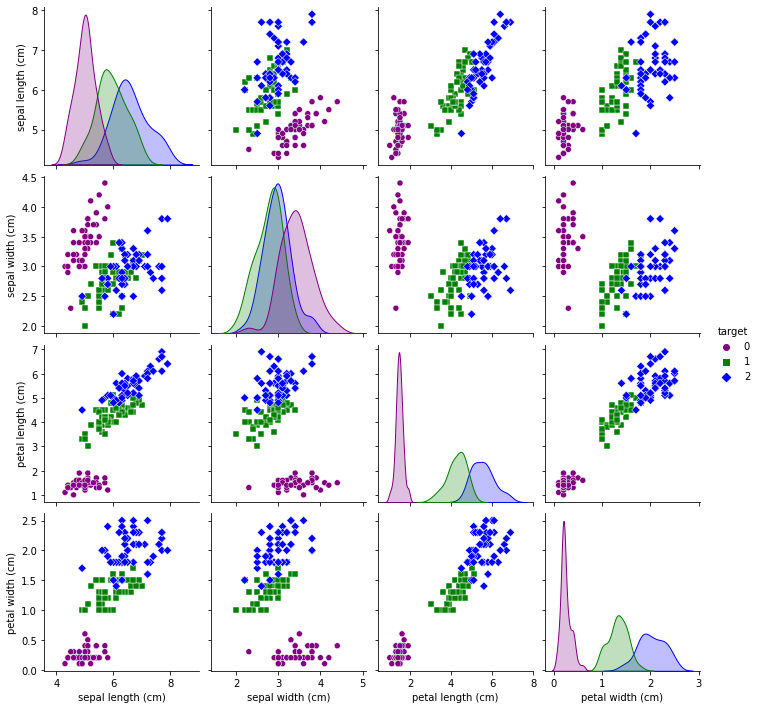

In [13]:
sns.pairplot(df, hue="target", height=2.5, markers=["o", "s", "D"], palette = mapa_de_cores) 

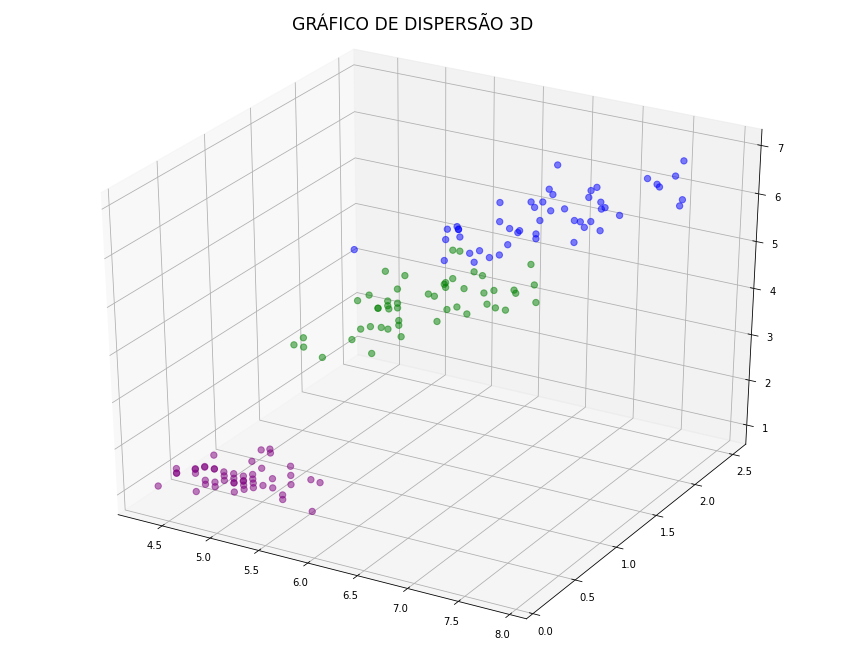

In [14]:
# Visualizar um gráfico de dispersão 3D entre 3 atributos

eixo_x = 'sepal length (cm)'
eixo_y = 'petal width (cm)'
eixo_z = 'petal length (cm)'

figura = plt.figure(figsize = (15,12))

# criar um gráfico 3D dentro da figura => default é 2D, 1(n da linha) 1(n coluna) 1(n de ordem do grafico)

grafico = figura.add_subplot(111,projection='3d')
grafico.scatter(
    df[eixo_x],
    df[eixo_y],
    df[eixo_z],
    c = cores_das_amostras,
    marker='o',
    s = 40, 
    alpha = 0.5, 
    )


plt.suptitle('GRÁFICO DE DISPERSÃO 3D', y=0.87, fontsize='xx-large')
plt.show()

In [15]:
df.columns[:-1]

mapa_de_cores = ['purple', 'green', 'blue']
classes

[0, 1, 2]

In [16]:
f0 = df[df['target'] == 0]
f1 = df[df['target'] == 1]
f2 = df[df['target'] == 2]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

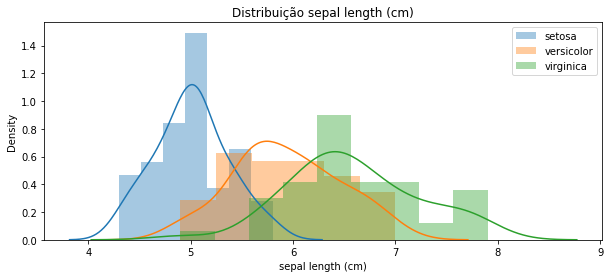

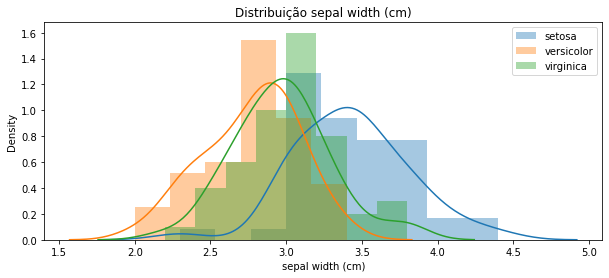

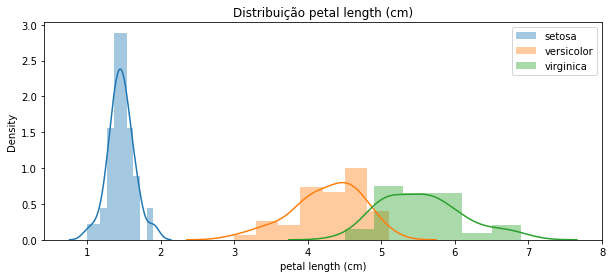

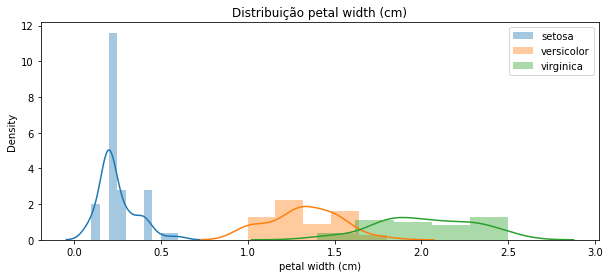

In [17]:
for col in df.columns[:-1]:
    
    plt.figure(figsize = (10,4))
    plt.title('Distribuição '+ col)
    sns.distplot(f0[col], label=dados.target_names[0])
    sns.distplot(f1[col], label=dados.target_names[1])
    sns.distplot(f2[col], label=dados.target_names[2])
    plt.legend()


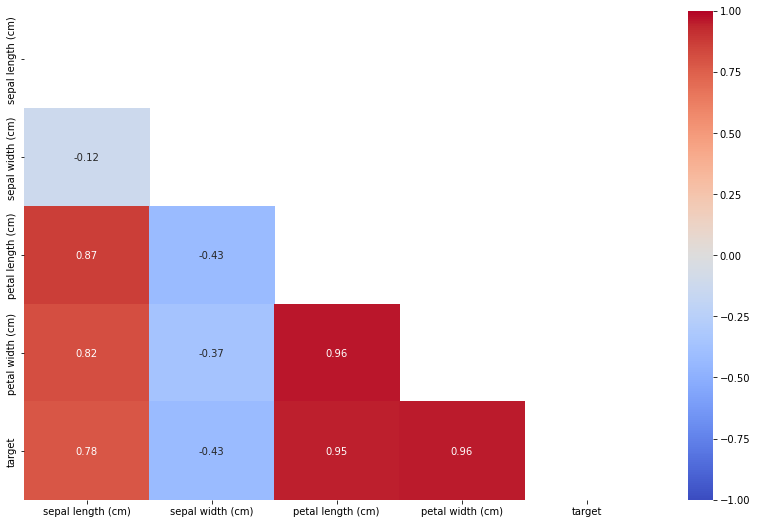

In [18]:
matrix = np.triu(df.corr())
fig, ax = plt.subplots(figsize=(14,9)) 
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, mask=matrix , cmap='coolwarm', ax=ax)

#### Separação dos dados em conjunto de teste e de treinamento:

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X = df.iloc[:,:-1]
y = df.iloc[:, -1]

In [21]:
X_treino,X_teste,y_treino,y_teste = train_test_split(X,y,test_size=0.3,random_state=12345)

In [22]:
from sklearn.preprocessing import StandardScaler

# Ajustar a escala dos atributos 

escala = StandardScaler()

escala.fit(X_treino)

X_treino = escala.transform(X_treino)
X_teste = escala.transform(X_teste)

Criação da função para cross validation

In [23]:
from sklearn.model_selection import cross_validate, KFold

def validacao_cruzada(modelo):
  
  kf = KFold(n_splits=10)
  scores = cross_validate(modelo, X_treino, y_treino, cv=kf, scoring='accuracy', return_train_score=True)
  return scores

#### Treinamento utilizando Multi-layer Perceptron (MLP)

##### Primeiro modelo utilizando função de otimização lfbgs

In [ ]:
from sklearn.neural_network import MLPClassifier

# função de ativação: relu definida como f(x) = max(0, x)
# funcao de resolucao: lbfgs - otimizador na familia dos métodos Quasi-Newton 

clf = MLPClassifier(solver='lbfgs', alpha=1,
                     hidden_layer_sizes=(50,4), random_state=12)

score1 = validacao_cruzada(clf)

In [25]:
acuracia = score1['test_score'].mean()
desvio = score1['test_score'].std()
print('Acurácia = %.2f %%' %(100*acuracia))
print('Desvio Padrão = %.3f' %(desvio))

Acurácia = 96.00 %
Desvio Padrão = 0.066


Ajustando o modelo

In [26]:
# função de ativação: relu
# funcao de resolucao: lbfgs - otimizador na familia dos métodos Quasi-Newton 

clf = MLPClassifier(solver='lbfgs', alpha=1,
                     hidden_layer_sizes=(2, 1), random_state=12)


score2 = validacao_cruzada(clf)

In [27]:
acuracia = score2['test_score'].mean()
desvio = score2['test_score'].std()
print('Acurácia = %.2f %%' %(100*acuracia))
print('Desvio Padrão = %.3f' %(desvio))

Acurácia = 96.00 %
Desvio Padrão = 0.066


Utilizando função de ativação logística

In [28]:
# função de ativação: sigmoide
# funcao de resolucao: lbfgs - otimizador na familia dos métodos Quasi-Newton 

clf = MLPClassifier(solver='lbfgs', alpha=1,
                     hidden_layer_sizes=(3, 4), random_state=12, activation='logistic')

score3 = validacao_cruzada(clf)

In [29]:
acuracia = score3['test_score'].mean()
desvio = score3['test_score'].std()
print('Acurácia = %.2f %%' %(100*acuracia))
print('Desvio Padrão = %.3f' %(desvio))

Acurácia = 95.09 %
Desvio Padrão = 0.066


##### Segundo modelo utilizando função de otimização sgd

In [ ]:
# função de ativação: relu
# funcao de resolucao: 'sgd' (otimização baseada em gradiente estocástico descendente)

clf = MLPClassifier(solver='sgd', momentum=0.99,  random_state=12, learning_rate_init= 1e-3, hidden_layer_sizes=(10, 4), activation='relu',learning_rate='adaptive')


score4 = validacao_cruzada(clf)

In [31]:
acuracia = score4['test_score'].mean()
desvio = score4['test_score'].std()
print('Acurácia = %.2f %%' %(100*acuracia))
print('Desvio Padrão = %.3f' %(desvio))

Acurácia = 94.18 %
Desvio Padrão = 0.091


##### Terceiro modelo utilizando função de otimização adam

In [ ]:
# função de ativação: relu
# funcao de resolucao: adam

clf = MLPClassifier(solver='adam', beta_1=0.9,beta_2=0.99,random_state=12, learning_rate_init= 3e-4, hidden_layer_sizes=(100,4), activation='relu')

score6 = validacao_cruzada(clf)

In [33]:
acuracia = score6['test_score'].mean()
desvio = score6['test_score'].std()
print('Acurácia = %.2f %%' %(100*acuracia))
print('Desvio Padrão = %.3f' %(desvio))

Acurácia = 91.27 %
Desvio Padrão = 0.103


#### Escolhendo o classificador ajustado com maior acurácia e menor desvio padrão, para aplicar no conjunto de teste.

In [34]:
clf = MLPClassifier(solver='lbfgs', alpha=1,
                     hidden_layer_sizes=(2, 1), random_state=12)

In [35]:
# Obtendo as respostas do classificador 
clf.fit(X_treino, y_treino)


y_resposta_treino = clf.predict(X_treino)
y_resposta_teste = clf.predict(X_teste)

In [36]:
print('\n DESEMPENHO DENTRO DA AMOSTRA DE TREINO')

total = len(y_treino)
acertos = sum(y_resposta_treino==y_treino)
erros = sum(y_resposta_treino!=y_treino)
acuracia = acertos/total

print('\n Total de amostras:', total)
print(' Respostas corretas:', acertos)
print(' Respostas erradas:', erros)
print(' Acurácia = %.3f %%' %(100*acuracia))

print('\n DESEMPENHO NA AMOSTRA DE TESTE')

total = len(y_teste)
acertos = sum(y_resposta_teste==y_teste)
erros = sum(y_resposta_teste!=y_teste)
acuracia = acertos/total

print('\n Total de amostras:', total)
print(' Respostas corretas:', acertos)
print(' Respostas erradas:', erros)
print(' Acurácia = %.3f %%' %(100*acuracia))


 DESEMPENHO DENTRO DA AMOSTRA DE TREINO

 Total de amostras: 105
 Respostas corretas: 103
 Respostas erradas: 2
 Acurácia = 98.095 %

 DESEMPENHO NA AMOSTRA DE TESTE

 Total de amostras: 45
 Respostas corretas: 44
 Respostas erradas: 1
 Acurácia = 97.778 %
